In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats



In [3]:
dfval = pd.read_csv('Advertising.csv')
dfval.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
dfval = dfval.drop('Unnamed: 0', axis=1)
dfval.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
#Find the correlation between variables
print("------------------PEARSON COEFFICIENT:-----------------")
pearsoncorr = dfval.corr(method='pearson')
print(pearsoncorr)
print('\n',"------------------SPEARMAN COEFFICIENT:----------------")
spearmancorr = dfval.corr(method = 'spearman')
print(spearmancorr)
print('\n',"------------------KENDALL COEFFICIENT:------------------")
kendallcorr = dfval.corr(method = 'kendall')
print(kendallcorr)

------------------PEARSON COEFFICIENT:-----------------
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

 ------------------SPEARMAN COEFFICIENT:----------------
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.056123   0.050840  0.800614
Radio      0.056123  1.000000   0.316979  0.554304
Newspaper  0.050840  0.316979   1.000000  0.194922
Sales      0.800614  0.554304   0.194922  1.000000

 ------------------KENDALL COEFFICIENT:------------------
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.041202   0.034156  0.621946
Radio      0.041202  1.000000   0.207077  0.419447
Newspaper  0.034156  0.207077   1.000000  0.132271
Sales      0.621946  0.419447   0.132271  1.000000


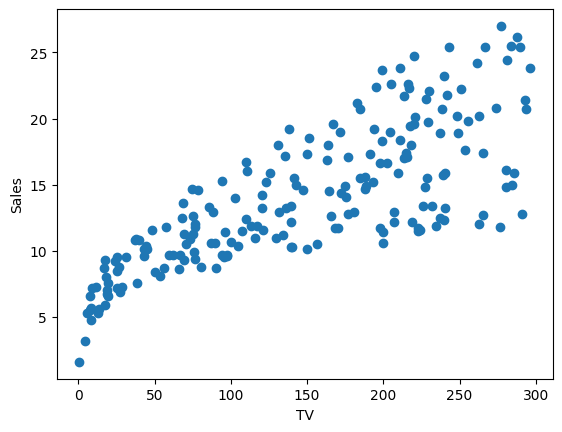

In [6]:
# by looking at the above result TV and Sales have a strong linear coeffcient  , now we print a plot for see the correlation cofficient
dataval1 = dfval['TV']
dataval2 = dfval['Sales']
plt.xlabel("TV")
plt.ylabel("Sales")
plt.scatter(dataval1,dataval2)
plt.show()

In [7]:
# now we see the coorelation b/w tv and sales
print("using scipy , correlation between two variables tv and sales")
pearsoncorr =  scipy.stats.pearsonr(dataval1,dataval2)[0]
spearmancorr = scipy.stats.spearmanr(dataval1,dataval2)[0]
kendallcorr = scipy.stats.kendalltau(dataval1,dataval2)[0]
s = pd.Series(data=[pearsoncorr,spearmancorr,kendallcorr], index=['pearson','spearman','kendall'])
print(s)

using scipy , correlation between two variables tv and sales
pearson     0.782224
spearman    0.800614
kendall     0.621946
dtype: float64


In [8]:
#There is strong correlation coefficient b/w tv and sales attribute . so,we construct our model using this two attributes
Xval = dfval['TV'].values.reshape(-1,1)
yval = dfval['Sales'].values.reshape(-1,1)
#Linear regression model on Tv and Sales data of advertising
Xval_train,Xval_test,yval_train,yval_test = train_test_split(Xval,yval,test_size=0.3,random_state=42)
regressorval = LinearRegression()
regressorval.fit(Xval_train,yval_train)


LinearRegression()

In [9]:
# to retreive the intercept of linear regerssion model
print(regressorval.intercept_)
# for retrieving the slop of the linear regression model
print(regressorval.coef_)

[7.23945983]
[[0.0464078]]


In [10]:
#comparison b/w actual actual target values and predicted target value of our model
yval_pred = regressorval.predict(Xval_test)
df = pd.DataFrame({'Actual': yval_test.flatten(),'Predicted':yval_pred.flatten()})
print(df)

    Actual  Predicted
0     16.9  14.817854
1     22.4  16.307544
2     21.4  20.832305
3      7.3   7.782431
4     24.7  17.463099
5     12.6  10.724686
6     22.3  17.300671
7      8.4   9.559850
8     11.5  17.560555
9     14.9  15.365466
10     9.5   8.701306
11     8.7   9.847578
12    11.9  18.122089
13     5.3   7.490062
14    10.3  13.713348
15    11.7  15.138068
16     5.5   7.578237
17    16.6  16.409642
18    11.3  10.733967
19    18.9  18.256672
20    19.7  17.890050
21    12.5  10.385909
22    10.9   9.002956
23    22.2  18.883177
24     9.3  10.441598
25     8.1   9.722277
26    21.7  17.147526
27    13.4  13.704067
28    10.6  11.286220
29     5.7   7.629285
30    10.6  16.511739
31    11.3  10.450880
32    23.7  16.469972
33     8.7   8.023752
34    16.1  20.266130
35    20.7  18.293798
36    11.6   9.480957
37    20.8  19.941275
38    11.9  12.678454
39     6.9   8.515674
40    11.0  12.622765
41    12.8  15.453641
42    10.1   9.239636
43     9.7  10.130666
44    11.6

In [11]:
#Accuracy of our model 
print('')
r2_score = regressorval.score(Xval_test,yval_test)
print('accuracy of model is')
print(r2_score*100,'%')


accuracy of model is
67.14477229302764 %


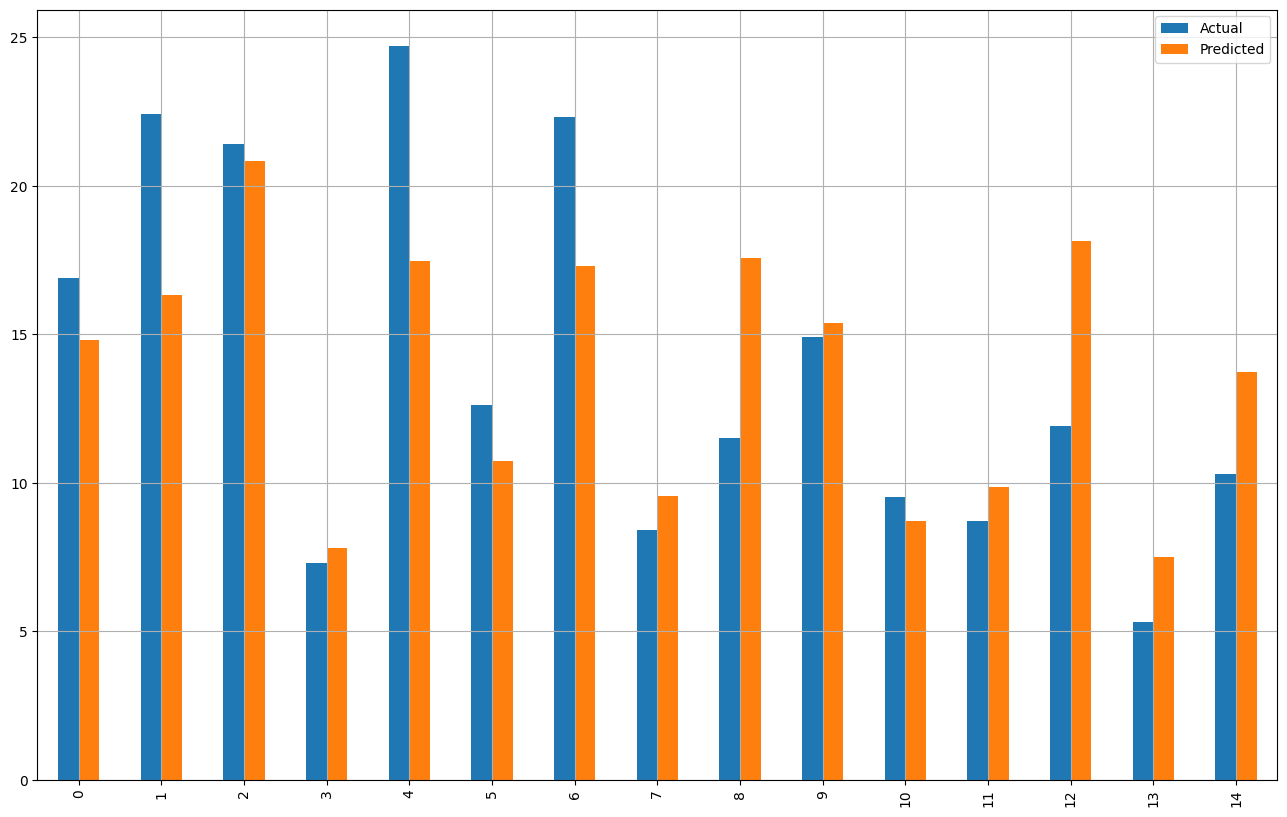

In [12]:
# We will create a bar graph of the first 15 values to show actual and predicted values

dfval1 = df.head(15)
dfval1.plot(kind='bar',figsize=(16,10))
plt.grid()
plt.show()

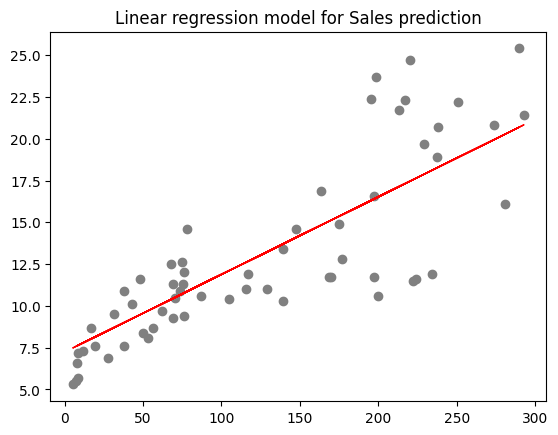

In [13]:
#this show the predicted y value in line , with points showing actual y values for test data
plt.scatter(Xval_test,yval_test,color = 'gray')
plt.plot(Xval_test,yval_pred,color = 'red',linewidth=1)
plt.title("Linear regression model for Sales prediction")
plt.show()